In [1]:
import functools
from pathlib import Path

import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

BASE_DIR = Path().resolve()
TSV_DIR = BASE_DIR / "data" / "tsv"
TEMP_DIR = TSV_DIR / "temp"


In [2]:
def read_tsv_in_dir_and_merge(tsv_dir):
    # tsv_dir is a Path obj
    tsv_files = tsv_dir.rglob("*.tsv")
    df = pd.DataFrame()
    for tsv in tsv_files:
        df = pd.concat([df, pd.read_csv(tsv, sep="\t")])
        # Delete file
        # tsv.unlink()
    return df

agg_1_168_exp = read_tsv_in_dir_and_merge(TEMP_DIR)
agg_1_168_exp.head(15)

,FEATURE_ID,EXP_IM,EXP_RT,IM,INTENSITY,MZ,NORM_RT,QVALUE,IM_FLAT,IM_COUNT,MZ_COUNT,INTENSITY_FLAT,INTENSITY_COUNT
0,7743121668572422728,0.833948,2376.06,"[0.9935485, 1.0173542, 0.9901462, [0.97766805,...","[48.00197, 25.001118, 23.999681, [71.99853, 72...","[579.3281066078157, 708.3535000374928, 708.357...",34.918728,0.000002,"[0.9742641, 0.97766805, 0.9810717, 0.98901206,...",15,8,"[48.00197, 25.001118, 23.999681, 71.99853, 72....",15
1,7743147153838182964,1.128334,5548.98,"[1.0139545, 0.9561033, 1.0150878, 1.0626494, 0...","[68.00014, 104.00471, 51.00251, 15.000338, 31....","[445.2011117590191, 686.3856858360219, 686.389...",87.761898,0.000003,"[0.9561033, 0.97312933, 1.0139545, 1.0150878, ...",6,6,"[68.00014, 104.00471, 51.00251, 15.000338, 31....",6
2,7743176480279389687,1.054137,5628.93,"[[1.0468035, 1.04001, 1.0343475], [0.9515615, ...","[[48.999626, 64.00204, 55.9984], [48.00197, 10...","[708.3701567709128, 708.374321021339, 708.3784...",89.083454,0.000414,"[0.9515615, 0.967455, 0.98220617, 1.0037532, 1...",11,7,"[48.999626, 64.00204, 55.9984, 48.00197, 10.99...",11
3,7743213319189398251,0.901146,1492.26,"[[0.9765334, 1.0196205, 0.99921817], [0.962914...","[[51.00251, 45.999134, 79.001175], [26.000776,...","[380.1886010997264, 380.1916518338678, 380.194...",20.230521,0.000002,"[0.9606445, 0.9629148, 0.9765334, 0.98220617, ...",43,15,"[51.00251, 45.999134, 79.001175, 26.000776, 26...",43
4,7743260288331154982,0.940149,5740.67,"[0.98674357, [1.0139545, 1.016221], 0.98787785...","[26.000776, [44.002514, 46.999405], 26.000776,...","[547.240583033961, 547.244243110076, 733.32147...",90.889221,0.000114,"[0.94588333, 0.94588333, 0.94815475, 0.9481547...",28,19,"[26.000776, 44.002514, 46.999405, 26.000776, 1...",28
5,7743265752725248316,1.122720,4449.27,"[0.9901462, 0.9856093, 1.0354801, 1.0286841, 1...","[115.99658, 46.999405, 12.999451, 63.002026, 4...","[452.2505877115074, 452.2539150473328, 599.317...",69.667197,0.000002,"[0.9856093, 0.9901462, 1.0082875, 1.0105544, 1...",11,10,"[115.99658, 46.999405, 12.999451, 63.002026, 4...",11
6,7743285980781669807,1.003456,1546.88,"[1.0275513, 1.0309496, 1.0196205, 1.0014857]","[39.99975, 45.999134, 39.000378, 46.999405]","[499.32578386462455, 698.4361205044346, 956.51...",21.033478,0.000002,"[1.0014857, 1.0196205, 1.0275513, 1.0309496]",4,4,"[39.99975, 45.999134, 39.000378, 46.999405]",4
7,7743287175868739270,1.266970,5526.42,"[1.0717007, [0.95950925, 1.0468035], [1.068306...","[87.0047, [10.000413, 117.99361], [26.000776, ...","[350.1294703131408, 350.14118094699995, 576.29...",87.405401,0.000003,"[0.95950925, 1.0026195, 1.04001, 1.0468035, 1....",7,5,"[87.0047, 10.000413, 117.99361, 26.000776, 20....",7
8,7743316562713704570,1.213875,3490.37,"[0.98447496, [0.9856093, 0.9742641], 0.9844749...","[55.9984, [32.999866, 12.00049], 20.001076, [1...","[946.4564375151832, 1173.516812942276, 1173.52...",53.629745,0.000002,"[0.9742641, 0.9799372, 0.98447496, 0.98447496,...",6,4,"[55.9984, 32.999866, 12.00049, 20.001076, 10.0...",6
9,7743337676845337802,1.070533,4816.46,"[1.0728319, 0.9856093, 1.0524637, 0.9753988, 0...","[59.99871, 10.000413, 63.002026, 83.00519, 77....","[603.253666816772, 603.2575096619437, 603.2651...",75.873595,0.001633,"[0.96858996, 0.96972483, 0.9719946, 0.9753988,...",24,13,"[59.99871, 10.000413, 63.002026, 83.00519, 77....",24


In [18]:
len(agg_1_168_exp['FEATURE_ID'])

429449

In [3]:
agg_1_168_exp.shape

(429449, 13)

In [4]:
# Get percentage of features with 1MZ
perc_features_1mz = agg_1_168_exp[agg_1_168_exp["MZ_COUNT"] == 1].shape[0] / agg_1_168_exp.shape[0]
print('perc_features_1mz:', round(perc_features_1mz * 100, 2))

perc_features_1mz: 1.6


DISTRIBUTION OF MZ COUNT PER FEATURE


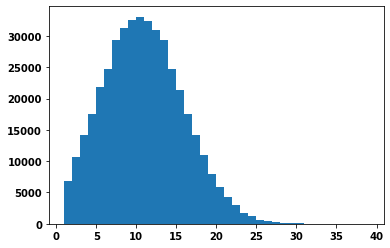

N = 429449


In [14]:
print('DISTRIBUTION OF MZ COUNT PER FEATURE')
plt.hist(agg_1_168_exp["MZ_COUNT"], bins=len(set(agg_1_168_exp["MZ_COUNT"])) + 1)
plt.show()
print("N =",len(agg_1_168_exp["MZ_COUNT"]))

/Users/irahorecka/.virtualenvs/roest-lab/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MZ_COUNT', ylabel='Density'>

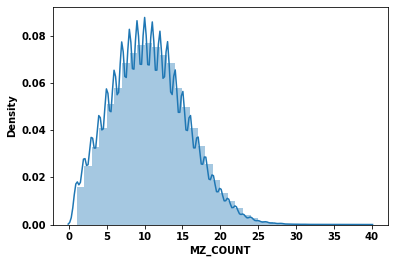

In [10]:
sns.distplot(agg_1_168_exp["MZ_COUNT"], bins=len(set(agg_1_168_exp["MZ_COUNT"])) + 1)

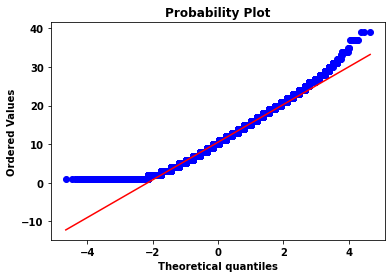

In [8]:
stats.probplot(agg_1_168_exp["MZ_COUNT"], dist="norm", plot=pylab)
pylab.show()

In [14]:
# This is not normal (i.e., not Gaussian)
stat, p = stats.jarque_bera(agg_1_168_exp["MZ_COUNT"])
print(stat, p)

8253.791416173068 0.0


In [209]:
# PLOTTING FUNCTIONS


def piechart_im_per_mz(summary_df):
    # Get ratio of IM per MZ reads PER feature ID
    summary_df["IM/MZ"] = summary_df["IM_COUNT"] / summary_df["MZ_COUNT"]
    labels, counts = zip(*summary_df["IM/MZ"].value_counts().iteritems())
    plt.pie(counts, labels=labels)
    plt.show()


def piechart_mz(summary_df):
    # Get MZ reads PER feature ID
    labels, counts = zip(*summary_df["MZ_COUNT"].value_counts().iteritems())
    plt.pie(counts, labels=labels)
    plt.show()


def piechart_im(summary_df):
    # Get IM reads PER feature ID
    labels, counts = zip(*summary_df["IM_COUNT"].value_counts().iteritems())
    plt.pie(counts, labels=labels)
    plt.show()


def hist_mz(mz_arr, bins=100):
    # Plot frequency of MZ
    plt.hist(mz_arr, bins=bins)
    plt.title(f"Significant Spectra (N={len(mz_arr)})")
    plt.xlabel("MZ")
    plt.xticks(np.arange(200, max(mz_arr) + 1, 100.0))
    plt.ylabel("Count")
    plt.show()


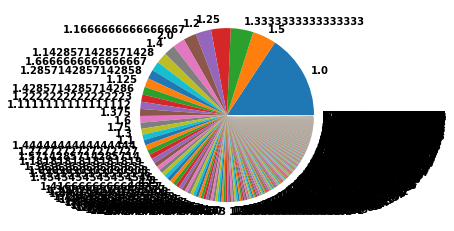

In [207]:
piechart_im_per_mz(agg_1_168_exp)

[(10, 33076), (9, 32559), (11, 32361), (8, 31215), (12, 30895), (13, 29353), (7, 29308), (14, 24799), (6, 24736), (5, 21887), (15, 21442), (4, 17612), (16, 17611), (17, 14210), (3, 14165), (18, 11006), (2, 10724), (19, 8017), (1, 6872), (20, 5823), (21, 4210), (22, 2988), (23, 1658), (24, 1196), (25, 619), (26, 446), (27, 254), (28, 184), (29, 75), (30, 51), (31, 41), (32, 19), (34, 18), (37, 9), (33, 4), (35, 3), (39, 3)]


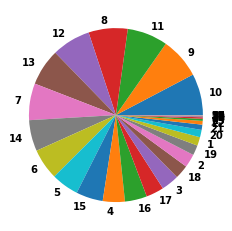

In [208]:
piechart_mz(agg_1_168_exp)

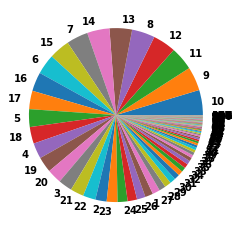

In [19]:
piechart_im(agg_1_168_exp)

In [8]:
# Function to compress nested list dynamically
def compress_list(l):
    concat = []
    for item in l:
        if hasattr(item, "__iter__"):
            concat.extend(item)
        else:
            concat.append(item)
    return concat


compress_list([[1, 2, 3], [1, 3, 10], 1, 2, [1, 2]])


[1, 2, 3, 1, 3, 10, 1, 2, 1, 2]

In [10]:
# Fetch MZ as written in summarized file
mz_arr = [eval(mz) for mz in agg_1_168_exp["MZ"]]
mz_arr_flat = compress_list(mz_arr)


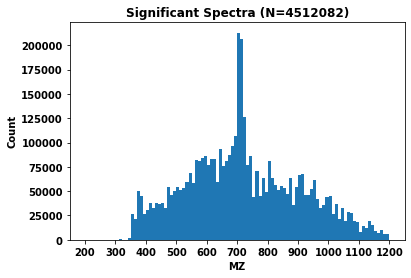

In [11]:
hist_mz(mz_arr_flat)

In [12]:
print(len(mz_arr_flat))
print(len(set(mz_arr_flat)))


4512082
12442


In [17]:
# Get pearson correlation correlating IM count and Intensity count / feature
# 0.99917
stats.pearsonr(agg_1_168_exp["IM_COUNT"], agg_1_168_exp["INTENSITY_COUNT"])
# Get pearson correlation correlating IM count and MZ count / feature
# 0.76936
stats.pearsonr(agg_1_168_exp["IM_COUNT"], agg_1_168_exp["MZ_COUNT"])
# Get pearson correlation correlating IM count and MZ count / feature
# 0.78047
stats.pearsonr(agg_1_168_exp["INTENSITY_COUNT"], agg_1_168_exp["MZ_COUNT"])

# Overall summary stats
agg_1_168_exp.corr()

,FEATURE_ID,EXP_IM,EXP_RT,NORM_RT,QVALUE,IM_COUNT,MZ_COUNT,INTENSITY_COUNT,IM/MZ
FEATURE_ID,1.000000,0.002300,-0.000816,-0.000763,-0.001582,0.001649,0.001096,0.001610,0.001381
EXP_IM,0.002300,1.000000,0.437772,0.437454,0.015804,-0.025913,-0.028782,-0.026103,-0.012026
EXP_RT,-0.000816,0.437772,1.000000,0.999895,0.031640,-0.090059,-0.155346,-0.091887,-0.015527
NORM_RT,-0.000763,0.437454,0.999895,1.000000,0.031543,-0.090102,-0.155372,-0.091927,-0.015550
QVALUE,-0.001582,0.015804,0.031640,0.031543,1.000000,0.017886,0.029616,0.018307,0.003664
IM_COUNT,0.001649,-0.025913,-0.090059,-0.090102,0.017886,1.000000,0.769362,0.999168,0.815907
MZ_COUNT,0.001096,-0.028782,-0.155346,-0.155372,0.029616,0.769362,1.000000,0.780472,0.333903
INTENSITY_COUNT,0.001610,-0.026103,-0.091887,-0.091927,0.018307,0.999168,0.780472,1.000000,0.806329
IM/MZ,0.001381,-0.012026,-0.015527,-0.015550,0.003664,0.815907,0.333903,0.806329,1.000000


In [45]:
agg_1_168_exp.head()

,FEATURE_ID,EXP_IM,EXP_RT,IM,INTENSITY,MZ,NORM_RT,QVALUE,IM_FLAT,IM_COUNT,MZ_COUNT,INTENSITY_FLAT,INTENSITY_COUNT,IM/MZ
0,7743121668572422728,0.833948,2376.06,"[0.9935485, 1.0173542, 0.9901462, [0.97766805,...","[48.00197, 25.001118, 23.999681, [71.99853, 72...","[579.3281066078157, 708.3535000374928, 708.357...",34.918728,0.000002,"[0.9742641, 0.97766805, 0.9810717, 0.98901206,...",15,8,"[48.00197, 25.001118, 23.999681, 71.99853, 72....",15,1.875000
1,7743147153838182964,1.128334,5548.98,"[1.0139545, 0.9561033, 1.0150878, 1.0626494, 0...","[68.00014, 104.00471, 51.00251, 15.000338, 31....","[445.2011117590191, 686.3856858360219, 686.389...",87.761898,0.000003,"[0.9561033, 0.97312933, 1.0139545, 1.0150878, ...",6,6,"[68.00014, 104.00471, 51.00251, 15.000338, 31....",6,1.000000
2,7743176480279389687,1.054137,5628.93,"[[1.0468035, 1.04001, 1.0343475], [0.9515615, ...","[[48.999626, 64.00204, 55.9984], [48.00197, 10...","[708.3701567709128, 708.374321021339, 708.3784...",89.083454,0.000414,"[0.9515615, 0.967455, 0.98220617, 1.0037532, 1...",11,7,"[48.999626, 64.00204, 55.9984, 48.00197, 10.99...",11,1.571429
3,7743213319189398251,0.901146,1492.26,"[[0.9765334, 1.0196205, 0.99921817], [0.962914...","[[51.00251, 45.999134, 79.001175], [26.000776,...","[380.1886010997264, 380.1916518338678, 380.194...",20.230521,0.000002,"[0.9606445, 0.9629148, 0.9765334, 0.98220617, ...",43,15,"[51.00251, 45.999134, 79.001175, 26.000776, 26...",43,2.866667
4,7743260288331154982,0.940149,5740.67,"[0.98674357, [1.0139545, 1.016221], 0.98787785...","[26.000776, [44.002514, 46.999405], 26.000776,...","[547.240583033961, 547.244243110076, 733.32147...",90.889221,0.000114,"[0.94588333, 0.94588333, 0.94815475, 0.9481547...",28,19,"[26.000776, 44.002514, 46.999405, 26.000776, 1...",28,1.473684


In [134]:
test = agg_1_168_exp[:10000]
mz, im, _int = eval(test['MZ'][60]), eval(test['IM'][60]), eval(test['INTENSITY'][60])

In [135]:
print(mz, '\n\n', im, '\n\n', _int)


[555.3518892552319, 718.4120843278317, 718.4162779554495, 718.4204715830671, 962.5335248753046, 1120.6095840337246] 

 [0.96177965, [1.0286841, 1.0694381], 1.0434068, 0.95950925, [0.9810717, 1.0218867], 1.0105544] 

 [22.999577, [48.999626, 12.999451], 42.001728, 10.000413, [26.000776, 51.99959], 42.001728]


In [199]:
mzs = list(agg_1_168_exp['MZ'])
ims = list(agg_1_168_exp['IM'])
l = []
for idx, mz in enumerate(mzs):
    mz = eval(mz)
    im = eval(ims[idx])
    for i in range(len(mz)):
        if isinstance(im[i], list):
            if not isinstance(mz[i], list):
                l.append(len(im[i]))
            else:
                l.append(len(im[i]) / len(mz[i]))
        else:
            l.append(1)

In [201]:
from collections import Counter
freq_mz_im = dict(sorted(dict(Counter(l)).items(), key=lambda item: item[1], reverse=True))
print(freq_mz_im)

{1: 3060879, 2: 811550, 3: 299618, 4: 155173, 5: 63398, 6: 42908, 7: 21866, 8: 12523, 10: 11221, 9: 9097, 12: 6437, 11: 4103, 18: 3912, 15: 2024, 13: 1594, 22: 1382, 17: 1112, 36: 823, 26: 716, 25: 711, 16: 611, 19: 159, 30: 146, 20: 118, 28: 1}


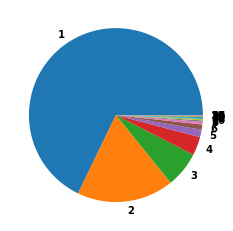

Number of observations: 4512082


In [202]:
# Freq: Number of IMs per MZ
labels = freq_mz_im.keys()
values = freq_mz_im.values()
plt.pie(values, labels=labels)
plt.show()
print("Number of observations:", functools.reduce(lambda x, y: x + y, values))

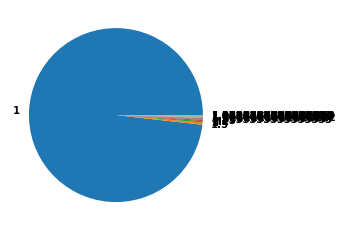

Number of observations: 4512082


In [198]:
# Freq: Number of IMs per INTENSITY
labels = freq_int_im.keys()
values = freq_int_im.values()
plt.pie(values, labels=labels)
plt.show()
print("Number of observations:", functools.reduce(lambda x, y: x + y, values))
